In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load datasets
train_original = pd.read_csv("data/train_ctrUa4K.csv")
test_original = pd.read_csv("data/test_lAUu6dG.csv")

In [6]:
# Make copy of original datasets
train = train_original.copy()
test = test_original.copy()

In [7]:
# Explore dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
# Univariate Analyis

In [12]:
# Target Variable = Loan_Status (categorical)
# Frequency Table
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
# Normailzed Loan_Status normalized freq. table
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

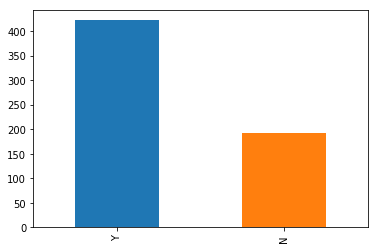

In [15]:
train['Loan_Status'].value_counts().plot.bar()

In [ ]:
# Visualizations for other variables

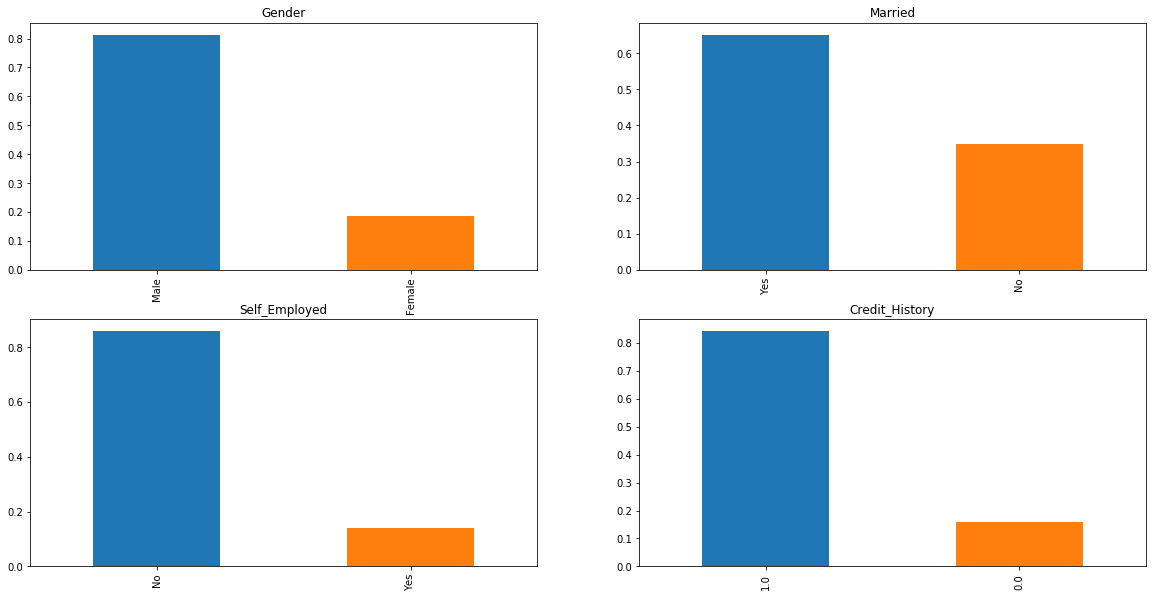

In [18]:
# Independent Variables (Categorical)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Credit_History')
plt.show()

In [19]:
# From the plots:
# - around 80% of the applicants are male
# - around 65% of the applicants are married
# - around 15% of the applicants are self employed
# - around 85% of the applicants' credit history meets the guidlines, they have repaid their debts

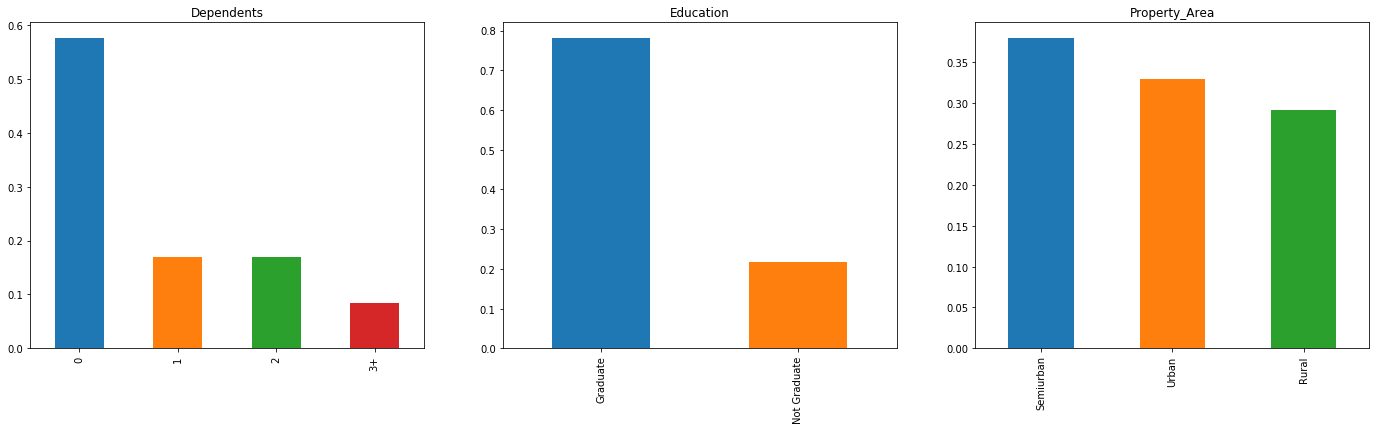

In [20]:
# Independent Variables (Ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Property_Area')
plt.show()

In [21]:
# From the plots:
# - around 58% of the applicants don't have any dependents
# - around 80% of the applicants are graduates
# - most applicants are from a semi-ruban area, but all 3 areas are represented with around 30 - 35%

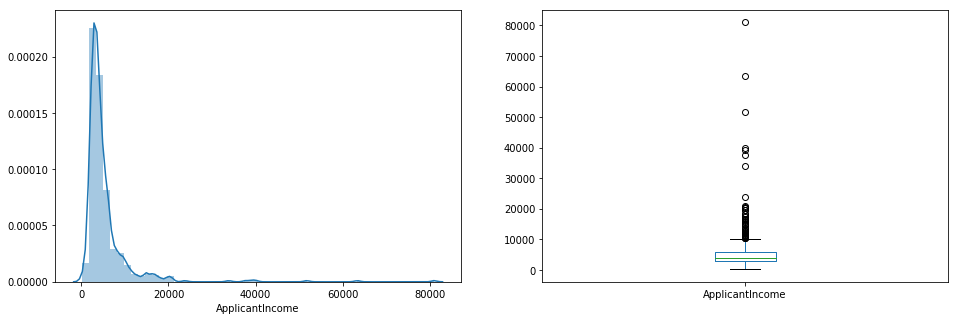

In [25]:
# Independent Variable (Numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

In [26]:
# The distribution of the applicants' income is skewed to the left (not normally distributed).
# The majority of applicants have an income between 0 and 10,000.
# The boxplot shows a lot of outliers/extreme values. This can be attributed to an income
# disparity in the dataset.

Text(0.5,0.98,'')

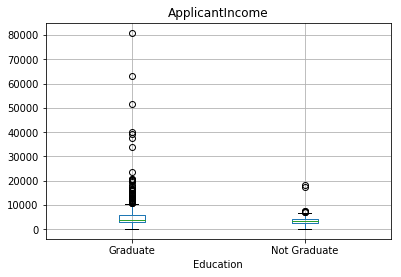

In [30]:
# Separate ApplicantIncome by Education to look for correlations
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

In [31]:
# The plot shows a large number of outliers in the 'Graduate' group,
# so some of the graduates have very high incomes

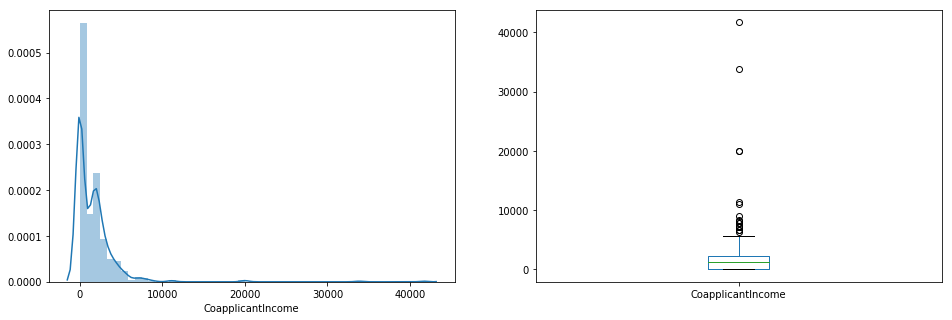

In [32]:
# CoapplicantIncome
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [33]:
# The distribution of co-applicants' income is also skewed (not normally distributed)
# the majority has an income between 0 and 5,000
# The boxplot also shows a lot of outliers

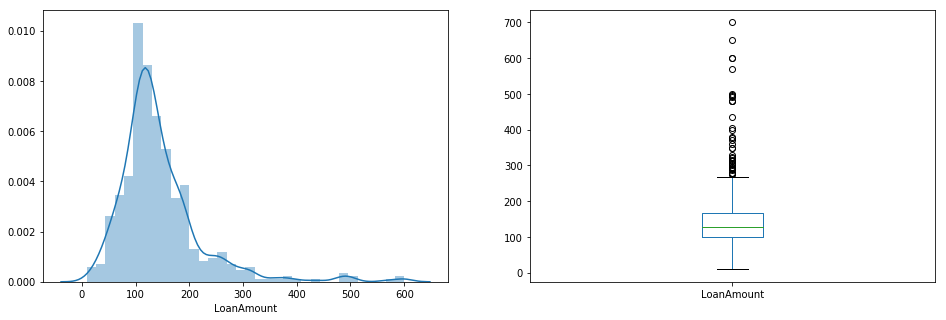

In [34]:
# LoanAmountValue
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [35]:
# The distribution is closer to a normal distribution,
# but still contains a fair amount of outliers